### Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products

* Data
* Variable Definition
* User_ID User ID
* Product_ID Product ID
* Gender Sex of User
* Age Age in bins
* Occupation Occupation (Masked)
* City_Category Category of the City (A,B,C)
* Stay_In_Current_City_Years Number of years stay in current city
* Marital_Status Marital Status
* Product_Category_1 Product Category (Masked)
* Product_Category_2 Product may belongs to other category also (Masked)
* Product_Category_3 Product may belongs to other category also (Masked)
* Purchase Purchase Amount (Target Variable)

In [1]:
# Import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Load the data and check the data for missing values and some statistics

train = pd.read_csv("blackFriday_train.csv")
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [4]:
#Number of rows and columns
train.shape

(550068, 12)

In [5]:
#check for missing values
train.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

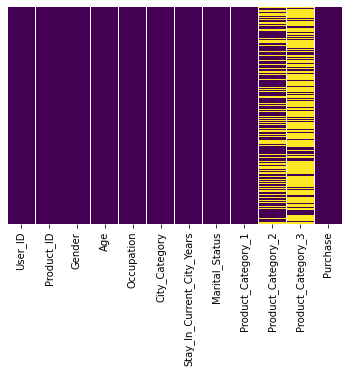

In [6]:
#It is important to check if there are any missing values in the dataset. We can check for missing values as a visualization. All the null values are shown in yellow color
sns.heatmap(train.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

In [7]:
#We can also check for missing values using the below code 

def display_missing(data):    
    for col in train.columns.tolist():          
        print('{} column missing values: {}'.format(col, data[col].isnull().sum()))
    print('\n')
    
display_missing(train)

User_ID column missing values: 0
Product_ID column missing values: 0
Gender column missing values: 0
Age column missing values: 0
Occupation column missing values: 0
City_Category column missing values: 0
Stay_In_Current_City_Years column missing values: 0
Marital_Status column missing values: 0
Product_Category_1 column missing values: 0
Product_Category_2 column missing values: 173638
Product_Category_3 column missing values: 383247
Purchase column missing values: 0




In [8]:
#check the statistics of the data
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [9]:
#Loading the test dataset

test = pd.read_csv("blackFriday_test.csv")
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
User_ID                       233599 non-null int64
Product_ID                    233599 non-null object
Gender                        233599 non-null object
Age                           233599 non-null object
Occupation                    233599 non-null int64
City_Category                 233599 non-null object
Stay_In_Current_City_Years    233599 non-null object
Marital_Status                233599 non-null int64
Product_Category_1            233599 non-null int64
Product_Category_2            161255 non-null float64
Product_Category_3            71037 non-null float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [11]:
test.shape
#test data will not have the target column i.e. Purchase. We need to predict that for the test data

(233599, 11)

In [12]:
#check for missing values in the test data
test.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [13]:
#Let's combine the train and test data to treat the missing values and perform some analysis. W ewill diide the data in the later stage

df = train.append(test, sort=False)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [14]:
df.shape

(783667, 12)

In [15]:
#Understanding the basic statistics of the data
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [16]:
#Dropping the unnecessary columns
df.drop(['User_ID'],axis=1,inplace=True)

In [17]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [18]:
df.groupby(['Age']).count()

,Product_ID,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Age,,,,,,,,,,
0-17,21334,21334,21334,21334,21334,21334,21334,15058,6859,15102
18-25,141953,141953,141953,141953,141953,141953,141953,98803,44889,99660
26-35,313015,313015,313015,313015,313015,313015,313015,214230,95281,219587
36-45,156724,156724,156724,156724,156724,156724,156724,107616,47274,110013
46-50,65278,65278,65278,65278,65278,65278,65278,44476,19156,45701
51-55,54784,54784,54784,54784,54784,54784,54784,37282,16039,38501
55+,30579,30579,30579,30579,30579,30579,30579,20220,8360,21504


In [19]:
#Convert the categorical data into integers using mapping

df['Gender'] = df['Gender'].map({'F':0,'M':1})
df.head(10)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0
5,P00193542,1,26-35,15,A,3,0,1,2.0,NaN,15227.0
6,P00184942,1,46-50,7,B,2,1,1,8.0,17.0,19215.0
7,P00346142,1,46-50,7,B,2,1,1,15.0,NaN,15854.0
8,P0097242,1,46-50,7,B,2,1,1,16.0,NaN,15686.0
9,P00274942,1,26-35,20,A,1,1,8,NaN,NaN,7871.0


In [20]:
#Checking the number of categories in the 'Age' column

df.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [21]:
#The column Age has 7 categories

df['Age'] = df['Age'].map({'0-17':1, '18-25':2, '26-35':3, '36-45':4, '46-50':5, '51-55':6, '55+':7 })
df.head(15)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0
5,P00193542,1,3,15,A,3,0,1,2.0,NaN,15227.0
6,P00184942,1,5,7,B,2,1,1,8.0,17.0,19215.0
7,P00346142,1,5,7,B,2,1,1,15.0,NaN,15854.0
8,P0097242,1,5,7,B,2,1,1,16.0,NaN,15686.0
9,P00274942,1,3,20,A,1,1,8,NaN,NaN,7871.0


In [22]:
#Check the number of categories for the City
df.City_Category.unique() 


array(['A', 'C', 'B'], dtype=object)

In [23]:
#We can also create dummy variables for the city and drop the first category

city = pd.get_dummies(df['City_Category'],drop_first=True)
city

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
5,0,0
6,1,0
7,1,0
8,1,0
9,0,0


In [24]:
#Concatenate teh city to the df 
df = pd.concat([df,city],axis=1)
df.head() # checking the dataset after transformation

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [25]:
#Check the Product Category columns

df.Product_Category_1.unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

In [26]:
df.Product_Category_2.unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [27]:
df.Product_Category_3.unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [28]:
#Product_category_1 has no missing values. The other product categories have missing values and we use mode to take care of them

df.Product_Category_1.mode()

0    5
dtype: int64

In [29]:
df.Product_Category_2.mode()

0    8.0
dtype: float64

In [30]:
df.Product_Category_3.mode()

0    16.0
dtype: float64

In [31]:
#Rename the column names
df.rename(columns={'Product_Category_1':'cat1','Product_Category_2':'cat2', 'Product_Category_3':'cat3'},inplace=True)

In [32]:
df.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'cat1', 'cat2', 'cat3',
       'Purchase', 'B', 'C'],
      dtype='object')

In [33]:
#Fill the missing values in cat 2 and cat3 with mode of the respective columns

df['cat2'] = df['cat2'].fillna(df['cat2'].mode()[0])

df['cat3'] = df['cat3'].fillna(df['cat3'].mode()[0])

In [34]:
#check for missing values
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
cat1                               0
cat2                               0
cat3                               0
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [35]:
#Filling the missing values in the purchase column with mean
df['Purchase'] = df['Purchase'].fillna(df['Purchase'].mean())

In [36]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,8.0,16.0,7969.0,0,1


In [37]:
df.isnull().sum() # all the null values have been removed

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
cat1                          0
cat2                          0
cat3                          0
Purchase                      0
B                             0
C                             0
dtype: int64

In [38]:
#Checking the stay in current city in years
df.Stay_In_Current_City_Years.unique() # checking the unique values in the column Stay_In_Current_City_Years


array(['2', '4+', '3', '1', '0'], dtype=object)

In [39]:
#Replace '+' with a blank
df['Stay_In_Current_City_Years']=df.Stay_In_Current_City_Years.str.replace('+','') # replacing + with blank

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
Product_ID                    783667 non-null object
Gender                        783667 non-null int64
Age                           783667 non-null int64
Occupation                    783667 non-null int64
City_Category                 783667 non-null object
Stay_In_Current_City_Years    783667 non-null object
Marital_Status                783667 non-null int64
cat1                          783667 non-null int64
cat2                          783667 non-null float64
cat3                          783667 non-null float64
Purchase                      783667 non-null float64
B                             783667 non-null uint8
C                             783667 non-null uint8
dtypes: float64(3), int64(5), object(3), uint8(2)
memory usage: 73.2+ MB


In [42]:
#converting the datatypes into integer ones as the datatype for these columns are shown as unsigned int in the info above
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)

In [43]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,C,4,0,8,8.0,16.0,7969.0,0,1


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
Product_ID                    783667 non-null object
Gender                        783667 non-null int64
Age                           783667 non-null int64
Occupation                    783667 non-null int64
City_Category                 783667 non-null object
Stay_In_Current_City_Years    783667 non-null int32
Marital_Status                783667 non-null int64
cat1                          783667 non-null int64
cat2                          783667 non-null float64
cat3                          783667 non-null float64
Purchase                      783667 non-null float64
B                             783667 non-null int32
C                             783667 non-null int32
dtypes: float64(3), int32(3), int64(5), object(2)
memory usage: 74.7+ MB
